In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/Position_Salaries.csv'
df = pd.read_csv(url)

In [3]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
y = df['Salary'].values                   # numpy array
x = df[['Level']].values

score 66.90412331929895


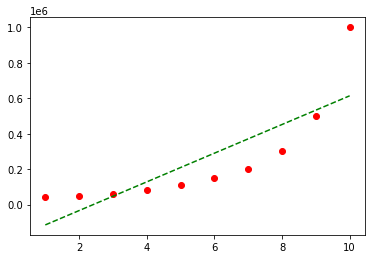

In [5]:
reg1 = LinearRegression()
reg1.fit(x,y)
ypred = reg1.predict(x)
print('score', reg1.score(x,y)*100)
plt.scatter(x,y,c='red')
plt.plot(x, ypred, 'g--')
plt.show()

In [6]:
poly2 = PolynomialFeatures(2)
x2 = poly2.fit_transform(x)
print(x2)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


score 91.62082221443943


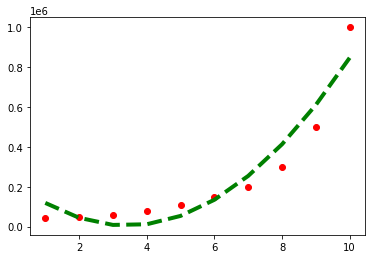

In [7]:
reg1 = LinearRegression()
reg1.fit(poly2.transform(x), y)
ypred = reg1.predict(poly2.transform(x))
print('score', reg1.score(poly2.transform(x),y)*100)
plt.scatter(x,y,c='red')
plt.plot(x, ypred, 'g--', linewidth=4)
plt.show()

In [8]:
# creating object 
pf = PolynomialFeatures(3)

In [9]:
# fitting PF on X
pf.fit(x)

PolynomialFeatures(degree=3)

In [10]:
# generate updated X values from PF
xopt = pf.transform(x)
xopt

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [11]:
# create and fit linear regression model
reg = LinearRegression()
reg.fit(xopt, y)

LinearRegression()

In [12]:
# score
reg.score(xopt, y)*100

98.12097727913365

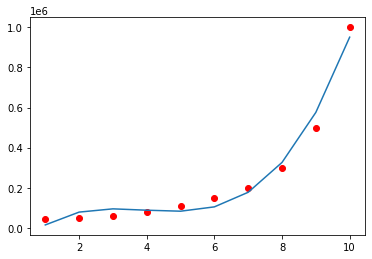

In [13]:
ypred = reg.predict(xopt)
plt.scatter(x, y , c='red')
plt.plot(x, ypred)
plt.show()

In [14]:
data = pf.transform([[15], [2.5]])
reg.predict(data)

array([5570275.05827484,   91272.29020979])

In [15]:
def get_polynomail_result(x, y, degree = 2):
    pf = PolynomialFeatures(degree)
    pf.fit(x)
    xopt = pf.transform(x)
    reg = LinearRegression()
    reg.fit(xopt, y)
    score = reg.score(xopt, y)*100
    ypred = reg.predict(xopt)
    plt.scatter(x, y, c= 'red')
    plt.plot(x, ypred)
    plt.text(2, 800000, f'score: {score:.2f}')
    plt.show()

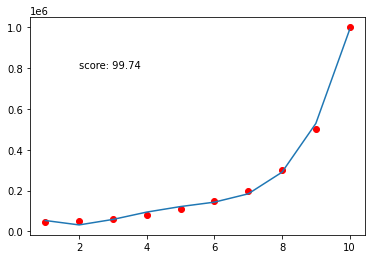

In [16]:
get_polynomail_result(x, y, 4)

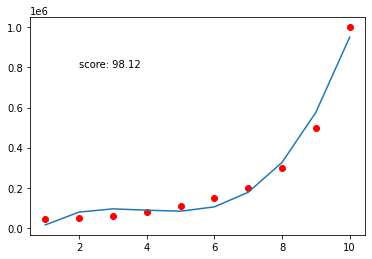

In [17]:
get_polynomail_result(x, y, 3)                                   # 99.99 check deg

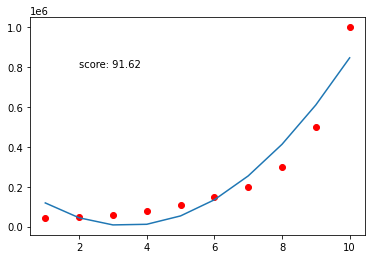

In [18]:
get_polynomail_result(x, y, 2)    

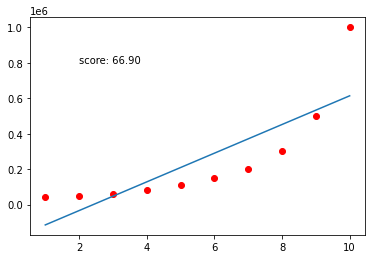

In [19]:
get_polynomail_result(x, y, 1)    

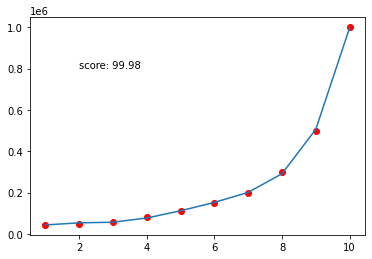

In [20]:
get_polynomail_result(x, y, 5)    